In [13]:
import cv2
import matplotlib.pyplot as plt 
import os
import numpy as np 
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import torch

In [ ]:
if not os.path.exists("train"):
    os.mkdir("train")
for i in os.listdir():
    if i.endswith(".tif"):
        if not i.endswith("ce.tif"):
            data = cv2.imread(i,3)
            cv2.imwrite("train" + "/"+i.split(".")[0] + ".jpg", data)

In [ ]:
if not os.path.exists("train"):
    os.mkdir("train")
for i in os.listdir():
    if i.endswith("ce.tif"):
        data = cv2.imread(i,2)
        cv2.imwrite("train" + "/"+i.split(".")[0] + ".jpg", data)

In [ ]:
data.shape

In [ ]:
fig, axs = plt.subplots(ncols=3, nrows=2,figsize=(50, 60))
data = cv2.imread("Data1.tif",3)
b,g,r = cv2.split(data)
axs[0,0].imshow(cv2.merge((r,b,g)))
axs[1,0].imshow(cv2.merge((r,g,b)))
axs[0,1].imshow(cv2.merge((g,r,b)))
axs[1,1].imshow(cv2.merge((g,b,r)))
axs[0,2].imshow(cv2.merge((b,r,g)))
axs[1,2].imshow(cv2.merge((b,g,r))) 
plt.show()

In [ ]:
for i in range(5):  
    ref = cv2.imread("Data1_reference.tif",i)
    plt.imshow(ref)
    plt.show()

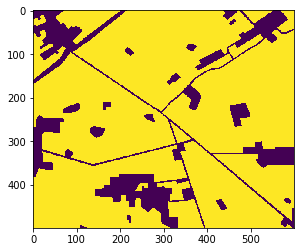

<class 'numpy.ndarray'>
(500, 600)


In [43]:
ref = cv2.imread("Data1_reference.tif",2)
plt.imshow(ref)
plt.show()
print(type(ref))
print(ref.shape)

In [ ]:
import cv2
import numpy as np 
for i in range(1,9):
    print(i)
    ref = cv2.imread("Data" + str(i) + "_reference.tif",2)
    # print(ref.shape)
    print(np.sum(ref))
    print(np.sum(ref)/(500*600))

In [ ]:
import cv2
from matplotlib import pyplot as plt

def whole_hist(image):
	'''
	绘制整幅图像的直方图
	'''
	plt.hist(image.ravel(), 256, [0, 256]) #numpy的ravel函数功能是将多维数组降为一维数组
	plt.show()

def channel_hist(image):
	'''
	画三通道图像的直方图
	'''
	color = ('b', 'g', 'r')   #这里画笔颜色的值可以为大写或小写或只写首字母或大小写混合
	for i , color in enumerate(color):
		hist = cv2.calcHist([image], [i], None, [256], [0, 256])  #计算直方图
		plt.plot(hist, color)
		plt.xlim([0, 256])
	plt.show()

image = cv2.imread('Data1.tif',3)
cv2.imshow('image', image)
cv2.waitKey(0)
whole_hist(image)
channel_hist(image)

In [ ]:
bottom = cv2.imread("Data1.tif",3)
top = cv2.imread("Data1_reference.tif", 2)
print(bottom.shape)
top = cv2.cvtColor(top, cv2.COLOR_GRAY2BGR)
overlapping = cv2.addWeighted(bottom, 0.5, top, 0.5, 0)
plt.imshow(overlapping)
plt.show()

In [ ]:

clf = make_pipeline( SVC(gamma='auto'))
data = cv2.imread("Data1.tif",3)
#print(data[0,0,:])
data = np.reshape(data, (-1,3))
#print(data[0])
label = cv2.imread("Data1_reference.tif", 2)
label = np.reshape(label, (-1,1))
print(data.shape, label.shape)
print("------------fit SVC------------")
clf.fit(data, label)
print("--------fit SVC finished-------")
data2 = cv2.imread("Data2.tif",3)
#print(data2[0,0,:])
data2 = np.reshape(data, (-1,3))
#print(data2[0])
label2 = cv2.imread("Data2_reference.tif", 2)
label2 = np.reshape(label, (-1,1))
result = clf.predict(data2)
result = np.reshape(result, (-1, 1))
print(np.sum(np.abs(result - label2)) )

In [ ]:
result = clf.predict(data2)
print(np.sum(np.abs(result - label2)) )

In [ ]:
result = np.reshape(result, (-1, 1))
np.sum(np.abs(result - label2))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
data = cv2.imread("Data1.tif",3)
#print(data[0,0,:])
data = np.reshape(data, (-1,3))
#print(data[0])
label = cv2.imread("Data1_reference.tif", 2)
label = np.reshape(label, (-1))
print(data.shape, label.shape)
print("------------fit SVC------------")
clf.fit(data, label)
print("--------fit SVC finished-------")
data2 = cv2.imread("Data2.tif",3)
#print(data2[0,0,:])
data2 = np.reshape(data, (-1,3))
#print(data2[0])
label2 = cv2.imread("Data2_reference.tif", 2)
label2 = np.reshape(label, (-1,1))
result = clf.predict(data2)
result = np.reshape(result, (-1, 1))
print(np.sum(np.abs(result - label2)) )

In [ ]:
import urllib
url, filename = ("https://github.com/mateuszbuda/brain-segmentation-pytorch/raw/master/assets/TCGA_CS_4944.png", "TCGA_CS_4944.png")
try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url, filename)

In [ ]:
import torch
model = torch.hub.load('mateuszbuda/brain-segmentation-pytorch', 'unet',
    in_channels=3, out_channels=1, init_features=32, pretrained=True)

In [ ]:
import numpy as np
from PIL import Image
from torchvision import transforms
filename = "dataSet/data100.jpg"
input_image = Image.open(filename)
m, s = np.mean(input_image, axis=(0, 1)), np.std(input_image, axis=(0, 1))
preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=m, std=s),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0)
print(input_batch.shape)
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model = model.to('cuda')

with torch.no_grad():
    output = model(input_batch)

print(torch.round(output[0]))

In [ ]:
print(model)

In [ ]:
def cropData(pic, label, crop_size=256, target_name=None):
    '''
    pic: a numpy with 500*600*3
    label: a numpy with 500*600 with value of 1 and 0
    '''
    h,w,c = pic.shape
    hl, wl = label.shape
    if h < crop_size or w< crop_size:
        print("-------input pic size too small---------")
    elif h!=hl or w!= wl:
        print("-------pic and label size not compact---------")
    else:
        for i in range(h-256):
            for j in range(w-256):
                crop_data = pic[i:i+256, j:j+256, :]
                label_data = label[i:i+256, j:j+256]
                




In [8]:
from models.uNet import UNet
checkpoint = torch.load('data.pkl')

UnpicklingError: A load persistent id instruction was encountered,
but no persistent_load function was specified.

In [4]:
ckpt

NameError: name 'ckpt' is not defined

In [ ]:
unet = UNet()
unet.load_state_dict(model_CKPT['state_dict'])

In [ ]:
def test_pic(pic_name, model):
    

In [35]:
from datasetAugmentation import rotate, random_gamma_transform, gamma_transform,blur
data = cv2.imread("Data1.tif", 3)
label_img = cv2.imread("Data1_reference.tif", 2)
# fig, axs = plt.subplots(ncols=2, nrows=1)
def plot_res_label(data, label_img):
    plt.figure()
    plt.imshow(data)
    plt.figure()
    plt.imshow(label_img)
    plt.show()

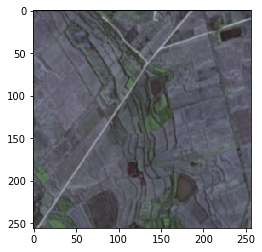

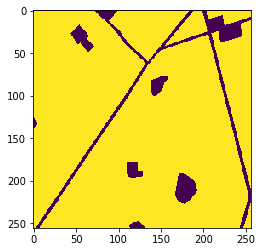

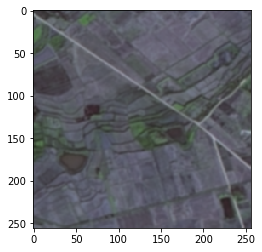

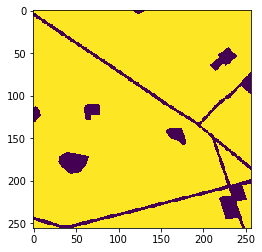

error: OpenCV(3.4.2) C:\Miniconda3\conda-bld\opencv-suite_1534379934306\work\modules\core\src\lut.cpp:368: error: (-215:Assertion failed) (lutcn == cn || lutcn == 1) && _lut.total() == 256 && _lut.isContinuous() && (depth == 0 || depth == 1) in function 'cv::LUT'


In [39]:
deal_data = data[100:356, 100:356, :]
deal_label = label_img[100:356, 100:356]
xb,yb = rotate(deal_data, deal_label, 90)
plot_res_label(xb, yb)
xb = blur(deal_data)
plot_res_label(xb, deal_label)
random_gamma_transform(deal_data, 1.0)


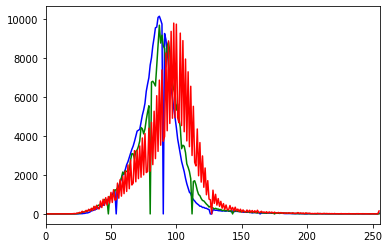

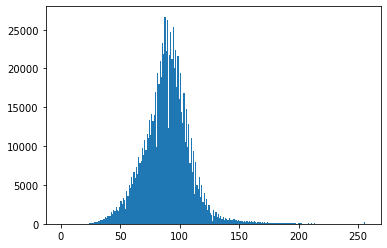

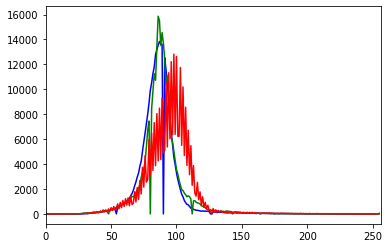

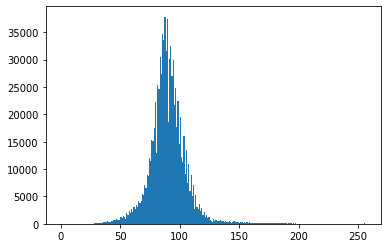

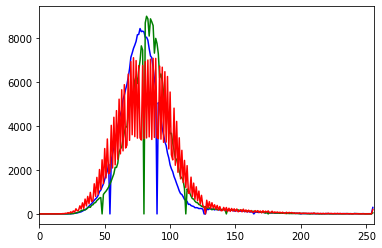

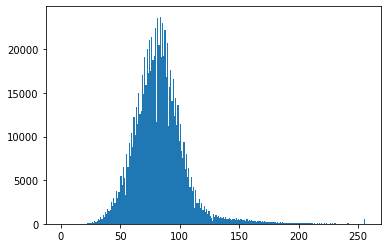

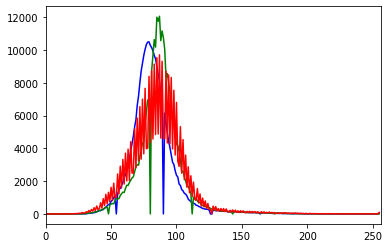

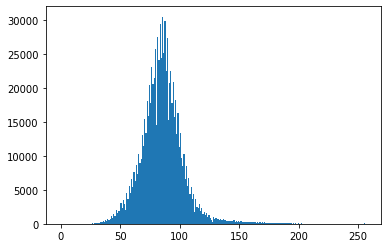

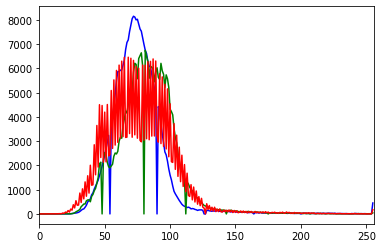

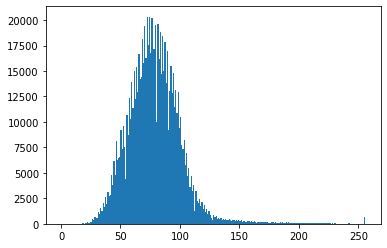

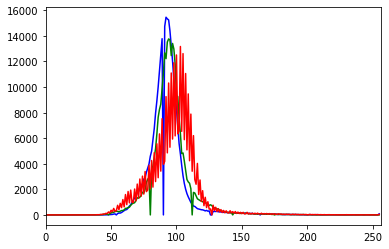

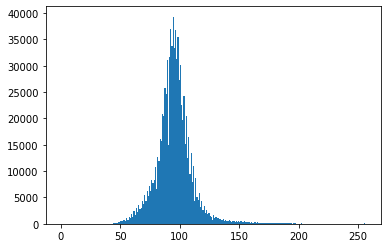

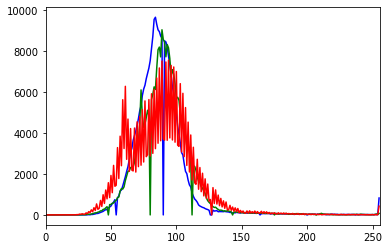

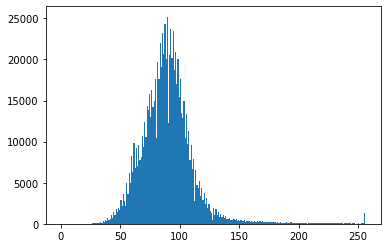

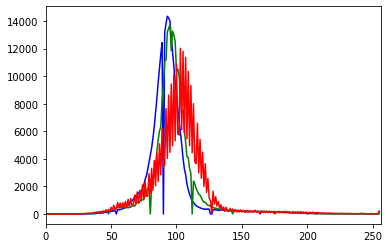

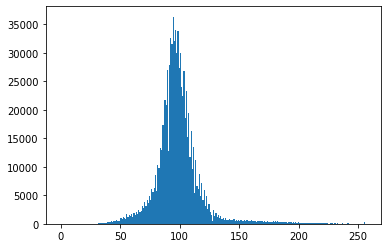

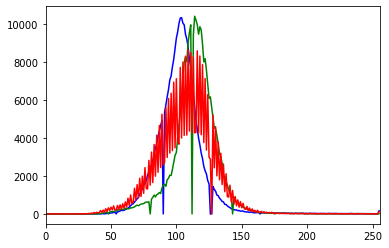

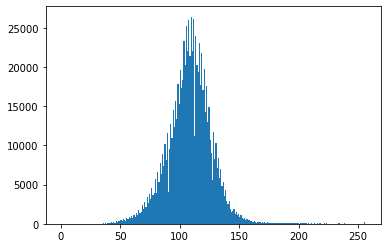

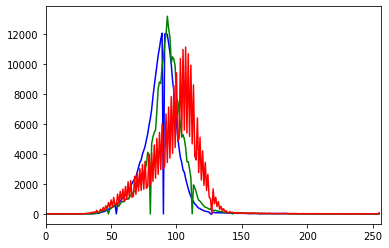

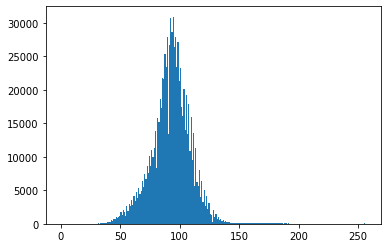

In [42]:
def channel_hist(image):
	'''
	画三通道图像的直方图
	'''
	color = ('b', 'g', 'r')   #这里画笔颜色的值可以为大写或小写或只写首字母或大小写混合
	for i , color in enumerate(color):
		hist = cv2.calcHist([image], [i], None, [256], [0, 256])  #计算直方图
		plt.plot(hist, color)
		plt.xlim([0, 256])
	plt.show()
def whole_hist(image):
	'''
	绘制整幅图像的直方图
	'''
	plt.hist(image.ravel(), 256, [0, 256]) #numpy的ravel函数功能是将多维数组降为一维数组
	plt.show()
for i in range(1,9):
    data = cv2.imread("Data"+ str(i)+".tif", 3)
    channel_hist(data)
    whole_hist(data)
for i in range(1,3):
    data = cv2.imread("Test"+ str(i)+".tif", 3)
    channel_hist(data)
    whole_hist(data)